In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


#import api_keys
from api_keys import api_key

In [27]:
def JasonData(startDate,endDate):
    base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+startDate+"&end_date="+endDate+"&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV"
    req = requests.get(base_url)
    return req.json()

#this function pulls data from the API
def createDictionary(json_data):
    
    #loop to go through the dictionary and the key parameters to dataframe
    for i in json_data['near_earth_objects']:
        
        try:
            if i !=0:
                print('Found Asteriods in this Date: ',i)
            
            for j in json_data['near_earth_objects'][i]:
                asteroids_data['name'].append(j['name'])
                asteroids_data['absolute magnitude'].append(j['absolute_magnitude_h'])
                asteroids_data['estimated diameter(max)'].append(j['estimated_diameter']['kilometers']['estimated_diameter_max'])
                asteroids_data['estimated diameter(min)'].append(j['estimated_diameter']['kilometers']['estimated_diameter_min'])
                asteroids_data['is potentially hazardous asteroid'].append(j['is_potentially_hazardous_asteroid'])
            for k in json_data ['near_earth_objects'][i]:
                asteroids_data['close approach: Earth miss distance'].append(k['close_approach_data'][0]['miss_distance']['kilometers'])
        except:
            print('There is no asteriod this day')
        
#giving titles to columns        
asteroids_data = {'name':[],
                 'absolute magnitude':[] ,
                 'estimated diameter(max)':[],
                  'estimated diameter(min)':[],
                 'is potentially hazardous asteroid':[],
                 'close approach: Earth miss distance':[]}
               

#running the function 4 times to pull data for the whole month
createDictionary(JasonData("2021-10-01","2021-10-08"))
createDictionary(JasonData("2021-10-09","2021-10-16"))
createDictionary(JasonData("2021-10-17","2021-10-24"))
createDictionary(JasonData("2021-10-25","2021-10-31"))



asteroids_df = pd.DataFrame.from_dict(asteroids_data)
#converting close approach data from object to float and reducing the digit count by representing the numbers in millions of kilometers
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance'].astype(float)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance']/1000000
asteroids_df



Found Asteriods in this Date:  2021-10-01
Found Asteriods in this Date:  2021-10-06
Found Asteriods in this Date:  2021-10-07
Found Asteriods in this Date:  2021-10-08
Found Asteriods in this Date:  2021-10-02
Found Asteriods in this Date:  2021-10-03
Found Asteriods in this Date:  2021-10-04
Found Asteriods in this Date:  2021-10-05
Found Asteriods in this Date:  2021-10-10
Found Asteriods in this Date:  2021-10-11
Found Asteriods in this Date:  2021-10-12
Found Asteriods in this Date:  2021-10-09
Found Asteriods in this Date:  2021-10-13
Found Asteriods in this Date:  2021-10-14
Found Asteriods in this Date:  2021-10-15
Found Asteriods in this Date:  2021-10-16
Found Asteriods in this Date:  2021-10-20
Found Asteriods in this Date:  2021-10-21
Found Asteriods in this Date:  2021-10-22
Found Asteriods in this Date:  2021-10-23
Found Asteriods in this Date:  2021-10-17
Found Asteriods in this Date:  2021-10-18
Found Asteriods in this Date:  2021-10-19
Found Asteriods in this Date:  202

,name,absolute magnitude,estimated diameter(max),estimated diameter(min),is potentially hazardous asteroid,close approach: Earth miss distance
0,138893 (2000 YH66),18.060,1.452245,0.649464,False,64.716708
1,386504 (2009 BP58),18.700,1.081534,0.483676,False,31.780410
2,(2012 QL14),24.400,0.078350,0.035039,False,49.369183
3,(2013 JE1),19.200,0.859093,0.384198,False,26.463244
4,(2013 JV17),27.800,0.016370,0.007321,False,71.070729
...,...,...,...,...,...,...
610,(2021 UM4),27.717,0.017007,0.007606,False,1.040335
611,(2021 UO4),26.289,0.032828,0.014681,False,6.165073
612,(2021 UF6),25.805,0.041024,0.018347,False,4.705099
613,(2021 UA7),28.738,0.010628,0.004753,False,0.128193


Question: Are asteroids coming closer to Earth typically larger or smaller in size than the ones that miss the earth at farther distances? How many asteroids with a diameter of 1 kilometer or more missed the Earth by 7.5 million kilometers or less?

Answer: There were zero asteroids with a diameter of 1 kilometer or more that missed the Earth by 7.5 million kilometers or less as it can be seen in the top-left quadrant of the below chart. Asteroids coming closer to Earth tend to be smaller than asteroids missing the earth at farther distances.

In [93]:
asteroids_df[(asteroids_df['estimated diameter(max)']>=1)&
             (asteroids_df['close approach: Earth miss distance']<=7.5)].count()


name                                   0
absolute magnitude                     0
estimated diameter(max)                0
estimated diameter(min)                0
is potentially hazardous asteroid      0
close approach: Earth miss distance    0
dtype: int64

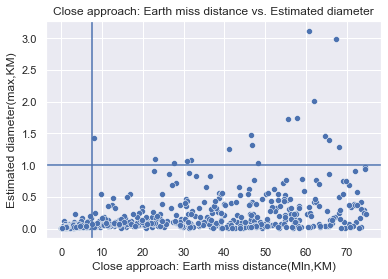

In [75]:
ax=sns.scatterplot(x = 'close approach: Earth miss distance',
            y = 'estimated diameter(max)',
            data = asteroids_df)
plt.axvline(x=7.5)
plt.axhline(y=1)

plt.xlabel('Close approach: Earth miss distance(Mln,KM)')
plt.ylabel('Estimated diameter(max,KM)')
plt.title('Close approach: Earth miss distance vs. Estimated diameter')

plt.show()


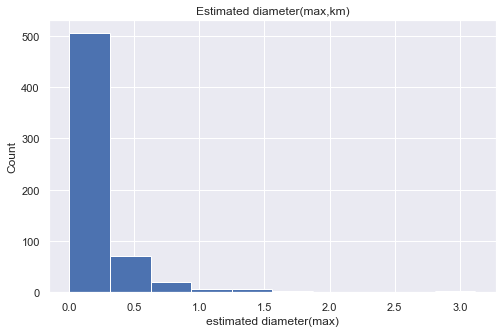

In [91]:

plt.figure(figsize=(8,5))
plt.title('Estimated diameter(max,km)')
plt.ylabel('Count')
plt.xlabel('estimated diameter(max)')
plt.hist(asteroids_df['estimated diameter(max)'])
plt.show()

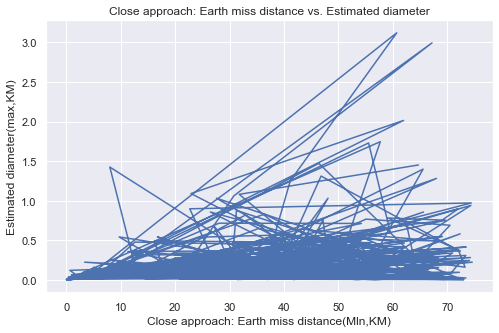

In [73]:
plt.figure(figsize=(8,5))
plt.title('Close approach: Earth miss distance vs. Estimated diameter')
plt.xlabel('Close approach: Earth miss distance(Mln,KM)')
plt.ylabel('Estimated diameter(max,KM)')
plt.plot(asteroids_df['close approach: Earth miss distance'],asteroids_data['estimated diameter(max)'])
plt.show()

Question: Are brighter (with higher absolute magnitude) asteroids bigger in size than darker (with lower absolute magnitude)?

Answer: Brighter asteroids are generally smaller in size than darker asteroids. The relationship between absolute magnitude and asteroid diameter appears to be negative logarithmic.

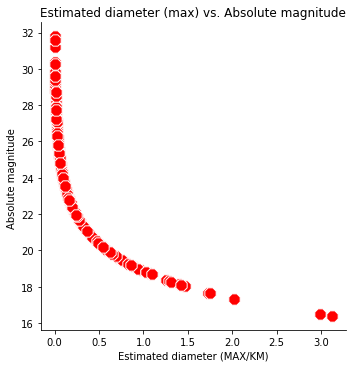

In [5]:
sns.relplot(x = 'estimated diameter(max)', y = 'absolute magnitude',
           data = asteroids_df,
           s = 150,
           color = 'red',
           marker = '8',).set(title = "Estimated diameter (max) vs. Absolute magnitude",
                                xlabel = 'Estimated diameter (MAX/KM)',
                                ylabel = 'Absolute magnitude ')
plt.show()

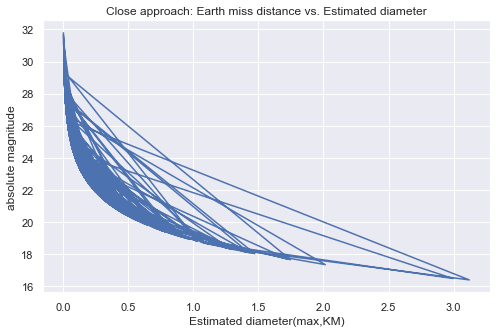

In [92]:
plt.figure(figsize=(8,5))
plt.title('Close approach: Earth miss distance vs. Estimated diameter')
plt.xlabel('Estimated diameter(max,KM)')
plt.ylabel('absolute magnitude')
plt.plot(asteroids_data['estimated diameter(max)'],asteroids_df['absolute magnitude'])
plt.show()

I have calculated few basic statistics(like mean, median, standard deviation)

In [115]:
round(asteroids_df["estimated diameter(max)"].mean(),2)

0.18

In [116]:
asteroids_df["absolute magnitude"].median()

24.636

In [120]:
round(asteroids_df["estimated diameter(max)"].std(),2)

0.31